# ASSIGNMENT2 STEREO VISION

## PART-A WRITTEN EXERCISE

(a) Show that the perspective projection of a line in 3D is still a line on the image plane.

(b) Show that, under perspective projection, the vanishing points of families of parallel lines that are on the same 3D plane lie on a single 2D line (or horizon) in image. See the figure below for illustration.

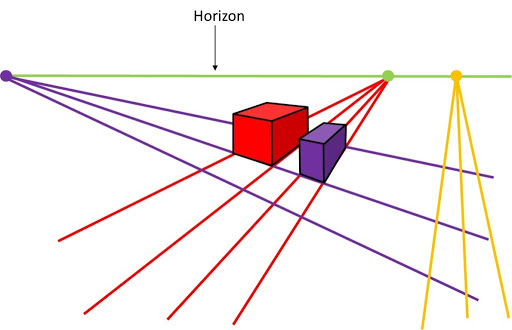

(c) Given the projection matrices of two stereo cameras and a pair of corresponding points (p and p’) on the image planes of two cameras, show the close-form solution for calculating the 3D scene point P that corresponds to the image points p and p’. 

## PART-B: CODING

Given five stereo image pairs, you are required to write a program with OpenCV to:

* Reconstruct the disparity map
* Estimate the relative height of two objects (you may need to segment the objects, for example, using grabcut algorithm in OpenCV.)

For each image pair, show
- Epipolar lines of any four corresponding points (15%)
- Disparity map	(15%)


The remaining 30% of marks will depend on the accuracy of relative height estimation between two objects (ratio between the objects on the left and on the right in terms of their heights).

* Pair-1: Estimate the relative height of two traffic cones. (6%)
* Pair-2: Estimate the relative height of the green box (tea) and brown box. (6%)
* Pair-3: Estimate the relative height of two books. (6%)
* Pair-4: Estimate the relative height of two bottles. (6%)
* Pair-5: Estimate the relative height of the statue and the right stone. (6%)

In [7]:
from utils import generate_md_table

title = [f'Pair-{i:d}' for i in range(1, 6)]
items = [f'![](data/{i:d}_a.jpg)' for i in range(1, 6)] + [f'![](data/{i:d}_b.jpg)' for i in range(1, 6)]
print(generate_md_table(items, title))

| Pair-1 | Pair-2 | Pair-3 | Pair-4 | Pair-5 |
| - | - | - | - | - |
| ![](data/1_a.jpg) | ![](data/2_a.jpg) | ![](data/3_a.jpg) | ![](data/4_a.jpg) | ![](data/5_a.jpg) |
| ![](data/1_b.jpg) | ![](data/2_b.jpg) | ![](data/3_b.jpg) | ![](data/4_b.jpg) | ![](data/5_b.jpg) |



| Pair-1 | Pair-2 | Pair-3 | Pair-4 | Pair-5 |
| - | - | - | - | - |
| ![](data/1_a.jpg) | ![](data/2_a.jpg) | ![](data/3_a.jpg) | ![](data/4_a.jpg) | ![](data/5_a.jpg) |
| ![](data/1_b.jpg) | ![](data/2_b.jpg) | ![](data/3_b.jpg) | ![](data/4_b.jpg) | ![](data/5_b.jpg) |

In [4]:
!ls ./data

1_a.jpg  2_a.jpg  3_a.jpg  4_a.jpg  5_a.jpg
1_b.jpg  2_b.jpg  3_b.jpg  4_b.jpg  5_b.jpg


In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread('data/1_a.jpg', 0)  #queryimage # left image
img2 = cv2.imread('data/1_b.jpg', 0) #trainimage # right image

sift = cv2.SIFT()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

good = []
pts1 = []
pts2 = []

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

AttributeError: module 'cv2' has no attribute 'SIFT'

In [9]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)

# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

NameError: name 'pts1' is not defined

In [ ]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
    img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

In [ ]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

## Reference

1. [Epipolar Geometry - OpenCV Tutorial](https://docs.opencv.org/3.4/da/de9/tutorial_py_epipolar_geometry.html)